## Customer Churn Prediction Using Artificial Neural Network (ANN)
Customer churn prediction is to measure why customers are leaving a business.
In this tutorial we will be looking at customer churn in telecom business.
We will build a deep learning model
to predict the churn and use precision,recall, f1-score to measure performance of our model

In [1]:

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6256,3751-KTZEL,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,35.05,35.05,Yes
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
6127,6198-PNNSZ,Female,0,Yes,No,56,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),109.80,6109.65,No
5349,5375-XLDOF,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.35,7665.8,No
5116,4759-TRPLW,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,70.40,70.4,Yes


you will clearly see that customer id is unneccessary so remove this columns

In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

my second last totalcharges is object how it that possible

In [6]:
df.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [7]:
pd.to_numeric(df.TotalCharges,errors="coerce")

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
df.dtypes



gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()].shape

(11, 20)

this is useful to print the specific value in the columns

In [12]:
df.iloc[488]['TotalCharges']

' '

In [14]:
df.shape

(7043, 20)

this is use where remove the unnecessay row in the data sets like 
every row has string or empty sell remove

In [36]:
df1=df[df.TotalCharges!=' ']


In [37]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

this is the method to change the datatypes e.g string to float
but in this datasets we change  the object into float

In [38]:
df1_total_charges=pd.to_numeric(df1.TotalCharges)

In [39]:
df1_total_charges.dtypes

dtype('float64')

In [40]:
type(df1)

pandas.core.frame.DataFrame

this people is not living in the company 
so check using this

In [42]:
df1[df1['Churn'] == 'No']



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


Purpose:
The code separates the tenure data for customers based on their churn status:

tenure_churn_no: Tenure values for customers who did not churn.
tenure_churn_yes: Tenure values for customers who did churn.
This separation is often used for comparative analysis to:

Understand differences in tenure between churned and non-churned customers.
Visualize or calculate metrics like mean, median, or distribution for each group

In [45]:
tenure_churn_no =df1[df1['Churn'] == 'No'].tenure
tenure_churn_yes =df1[df1['Churn'] == 'Yes'].tenure

In [50]:
print("The list of tenures for people who left the company: ", tenure_churn_yes.tolist())
print("The list of tenures for people still working in the company: ", tenure_churn_no.tolist())



The list of tenures for people who left the company:  [2, 2, 8, 28, 49, 10, 1, 1, 47, 1, 17, 5, 34, 11, 2, 15, 8, 18, 9, 1, 7, 12, 5, 25, 68, 55, 37, 10, 3, 27, 25, 1, 2, 1, 8, 1, 7, 20, 4, 58, 2, 53, 15, 7, 1, 8, 13, 1, 6, 1, 19, 2, 4, 4, 1, 1, 2, 11, 15, 1, 2, 1, 2, 3, 13, 59, 16, 1, 1, 5, 52, 18, 1, 8, 10, 24, 1, 4, 32, 5, 38, 24, 54, 2, 7, 2, 68, 43, 63, 2, 4, 21, 10, 27, 5, 2, 25, 1, 1, 11, 55, 34, 69, 1, 1, 3, 22, 1, 61, 12, 60, 1, 28, 4, 7, 13, 1, 1, 24, 5, 15, 48, 8, 1, 2, 22, 5, 12, 20, 2, 6, 5, 40, 27, 23, 34, 1, 10, 13, 39, 32, 35, 56, 12, 1, 4, 1, 12, 65, 9, 9, 7, 49, 43, 65, 56, 10, 43, 1, 20, 1, 2, 3, 1, 8, 2, 4, 2, 4, 1, 52, 2, 1, 2, 3, 3, 25, 1, 4, 3, 33, 30, 45, 10, 20, 15, 22, 3, 15, 1, 5, 33, 2, 2, 1, 46, 62, 10, 6, 40, 1, 58, 70, 2, 21, 16, 7, 60, 50, 4, 1, 55, 12, 1, 62, 1, 20, 3, 22, 4, 59, 60, 15, 10, 6, 63, 50, 1, 12, 9, 17, 9, 10, 1, 3, 13, 4, 6, 3, 35, 2, 1, 1, 8, 7, 2, 1, 44, 71, 1, 62, 1, 33, 35, 34, 4, 7, 27, 18, 2, 32, 18, 12, 8, 26, 3, 8, 38, 14, 32, 1, 1

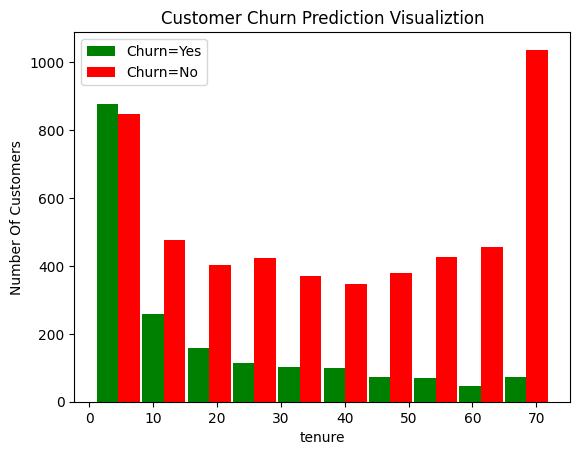

In [68]:

tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


In [71]:
mc_churn_no = df1[df1['Churn'] == 'No']['MonthlyCharges']
mc_churn_yes = df1[df1['Churn'] == 'Yes']['MonthlyCharges']


In [75]:
print(mc_churn_no)
print(mc_churn_yes)

0        29.85
1        56.95
3        42.30
6        89.10
7        29.75
         ...  
7037     21.15
7038     84.80
7039    103.20
7040     29.60
7042    105.65
Name: MonthlyCharges, Length: 5163, dtype: float64
2        53.85
4        70.70
5        99.65
8       104.80
13      103.70
         ...  
7021     59.80
7026     44.20
7032     75.75
7034    102.95
7041     74.40
Name: MonthlyCharges, Length: 1869, dtype: float64


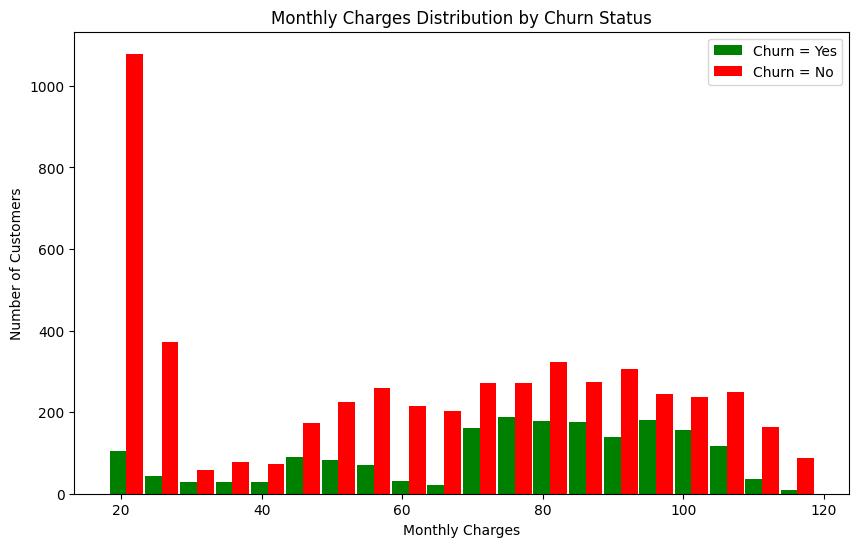

In [77]:
import matplotlib.pyplot as plt

# Filter MonthlyCharges for churned and non-churned customers
mc_churn_no = df1[df1['Churn'] == 'No']['MonthlyCharges']
mc_churn_yes = df1[df1['Churn'] == 'Yes']['MonthlyCharges']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist([mc_churn_yes, mc_churn_no], bins=20, rwidth=0.95, 
         color=['green', 'red'], label=['Churn = Yes', 'Churn = No'])

# Add labels and title
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Monthly Charges Distribution by Churn Status")
plt.legend()
plt.show()



all the unique value in very columns 
with the help  of for loop

In [88]:
def print_unique_col_values(df):
 for column in df:
    if df[column].dtype=='object':
     print( f"{column} :{df[column].unique()}")

In [97]:
print_unique_col_values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges :['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn :['No' 'Yes']


we want to changg no internet service or phone service are both to No


In [117]:
df1.replace('No internet service', 'No', inplace=True)

df1.replace('No phone service','No',inplace=True)

C:\Users\Hassan Ali\AppData\Local\Temp\ipykernel_5136\3482146259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
C:\Users\Hassan Ali\AppData\Local\Temp\ipykernel_5136\3482146259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [116]:
print_unique_col_values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes']
OnlineBackup :['Yes' 'No']
DeviceProtection :['No' 'Yes']
TechSupport :['No' 'Yes']
StreamingTV :['No' 'Yes']
StreamingMovies :['No' 'Yes']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges :['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn :['No' 'Yes']


convert the column yes and no into 1 and 0 form 

In [119]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({"yes ": 1,"No":0},inplace=True)

C:\Users\Hassan Ali\AppData\Local\Temp\ipykernel_5136\306431519.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({"yes ": 1,"No":0},inplace=True)
C:\Users\Hassan Ali\AppData\Local\Temp\ipykernel_5136\306431519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({"yes ": 1,"No":0},inplace=True)


In [121]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\Hassan Ali\AppData\Local\Temp\ipykernel_5136\1648037665.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
C:\Users\Hassan Ali\AppData\Local\Temp\ipykernel_5136\1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [122]:
for col in df1:
    print(f"{col}:{df1[col].unique()}")

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:[0 1]


we want to gender columns  in 0 and 1

In [128]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\Hassan Ali\AppData\Local\Temp\ipykernel_5136\698335744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
C:\Users\Hassan Ali\AppData\Local\Temp\ipykernel_5136\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [129]:
df1.gender.unique()

array([1, 0])

one hot encoding for categorical columns

In [141]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'], dtype=int)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [142]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3281,0,0,1,0,49,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2228,1,1,1,0,70,1,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
6702,0,0,1,1,18,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1891,1,1,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
5285,1,0,1,0,71,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0


In [143]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [145]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [147]:

for col in df2.columns:
    print(f'{col}: {df2[col].unique()}')


gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

now my data is ready to use in machine learning

now fit the data for testing with train test split

In [148]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [149]:
X_train.shape

(5625, 26)

In [150]:
X_test.shape

(1407, 26)

In [151]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


build a model (ann) in tensorflow/keras

In [152]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

c:\Users\Hassan Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7089 - loss: 0.5561
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7901 - loss: 0.4377
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.4237
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8167 - loss: 0.4073
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8045 - loss: 0.4139
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7954 - loss: 0.4144
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8125 - loss: 0.4007
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8053 - loss: 0.4080
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8113 - loss: 0.4002
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8144 - loss: 0.3953
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8136 - loss: 0.3939
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [153]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7794 - loss: 0.4917 


[0.4988664984703064, 0.7711442708969116]

In [154]:
yp=model.predict(X_test)
yp[:8]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.20692156],
       [0.6087462 ],
       [0.0225821 ],
       [0.7283546 ],
       [0.561469  ],
       [0.87700284],
       [0.05989975],
       [0.20839551]], dtype=float32)

In [156]:
y_test[:8]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
Name: Churn, dtype: int64

now am doing this every that is greater than 0.5 gooing to 1 and less 0

In [157]:
y_pred=[]
for element in yp:
    if element >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [158]:
y_pred[:8]

[0, 1, 0, 1, 1, 1, 0, 0]

In [159]:
from sklearn.metrics import confusion_matrix, classification_report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       999
           1       0.63      0.50      0.56       408

    accuracy                           0.77      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

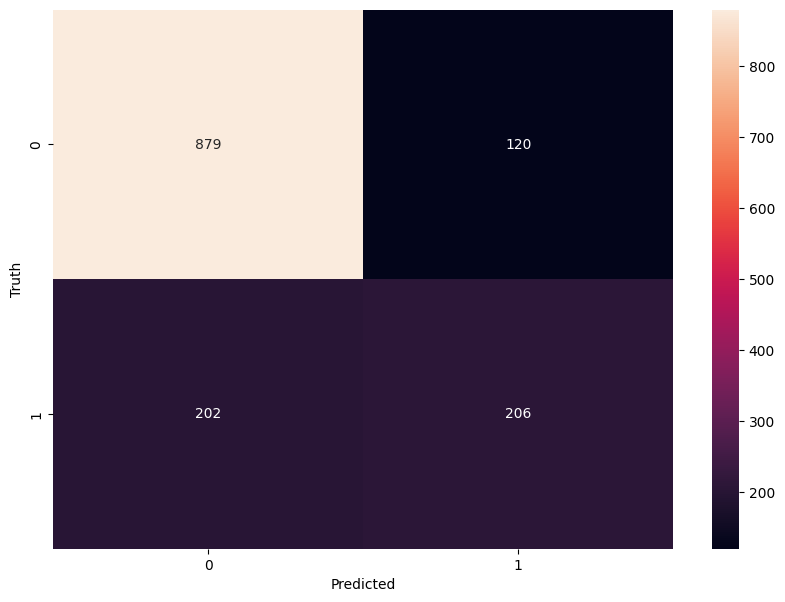

In [164]:
import seaborn as sn
cm =tf.math.confusion_matrix(labels=y_test,predictions=y_pred) 
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [165]:
y_test.shape

(1407,)

accuracy

In [166]:
round((862+229)/(862+229+137+179),2)

0.78

precision for  0 class for example precision for customer who did not churn

In [167]:
round(862/(862+179),2)

0.83

precision for 1 class for example precision for customer who actually churned

In [168]:
round(229/(229+137),2)

0.63

Recall for 0 class

In [169]:
round(862/(862+137),2)

0.86

In [170]:
round(229/(229+179),2)

0.56